In [4]:
import numpy as np 
import seaborn as sns 
import mdtraj as md 
import matplotlib.pyplot as plt 

In [13]:

particles = []
with open("shift_0.2/trajectory.lammpstrj", "r") as flmp:
        collect_line =False
        for line in flmp.readlines():
                
            if line.startswith("ITEM: TIMESTEP"):
                collect_line=False 
            
            if collect_line == True:
                entry = np.array([float(x) for x in line.split()])
                particles[-1].append(entry)
                
            if line.startswith("ITEM: ATOMS"):
                collect_line=True
                particles.append([])
                
            
    

[[[1.0, 1.0, 0.922557, 0.570875, 0.5], [2.0, 2.0, 0.924415, 0.569202, 0.5], [3.0, 1.0, 0.179967, 0.197608, 0.5], [4.0, 2.0, 0.177484, 0.197318, 0.5], [5.0, 1.0, 0.0174256, 0.797012, 0.5], [6.0, 2.0, 0.0156874, 0.798808, 0.5], [7.0, 1.0, 0.708349, 0.295389, 0.5], [8.0, 2.0, 0.709543, 0.293192, 0.5], [9.0, 1.0, 0.347058, 0.494284, 0.5], [10.0, 2.0, 0.34932, 0.493221, 0.5], [11.0, 1.0, 0.82811, 0.891179, 0.5], [12.0, 2.0, 0.827822, 0.888695, 0.5], [13.0, 1.0, 0.463402, 0.0611746, 0.5], [14.0, 2.0, 0.461214, 0.0599653, 0.5], [15.0, 1.0, 0.265207, 0.561132, 0.5], [16.0, 2.0, 0.2673, 0.562499, 0.5], [17.0, 1.0, 0.519482, 0.0113624, 0.5], [18.0, 2.0, 0.517004, 0.0116939, 0.5], [19.0, 1.0, 0.443684, 0.406429, 0.5], [20.0, 2.0, 0.444069, 0.408899, 0.5], [21.0, 1.0, 0.281654, 0.445594, 0.5], [22.0, 2.0, 0.282654, 0.447886, 0.5], [23.0, 1.0, 0.170279, 0.468253, 0.5], [24.0, 2.0, 0.170935, 0.46584, 0.5], [25.0, 1.0, 0.897807, 0.587244, 0.5], [26.0, 2.0, 0.89551, 0.58823, 0.5], [27.0, 1.0, 0.979655

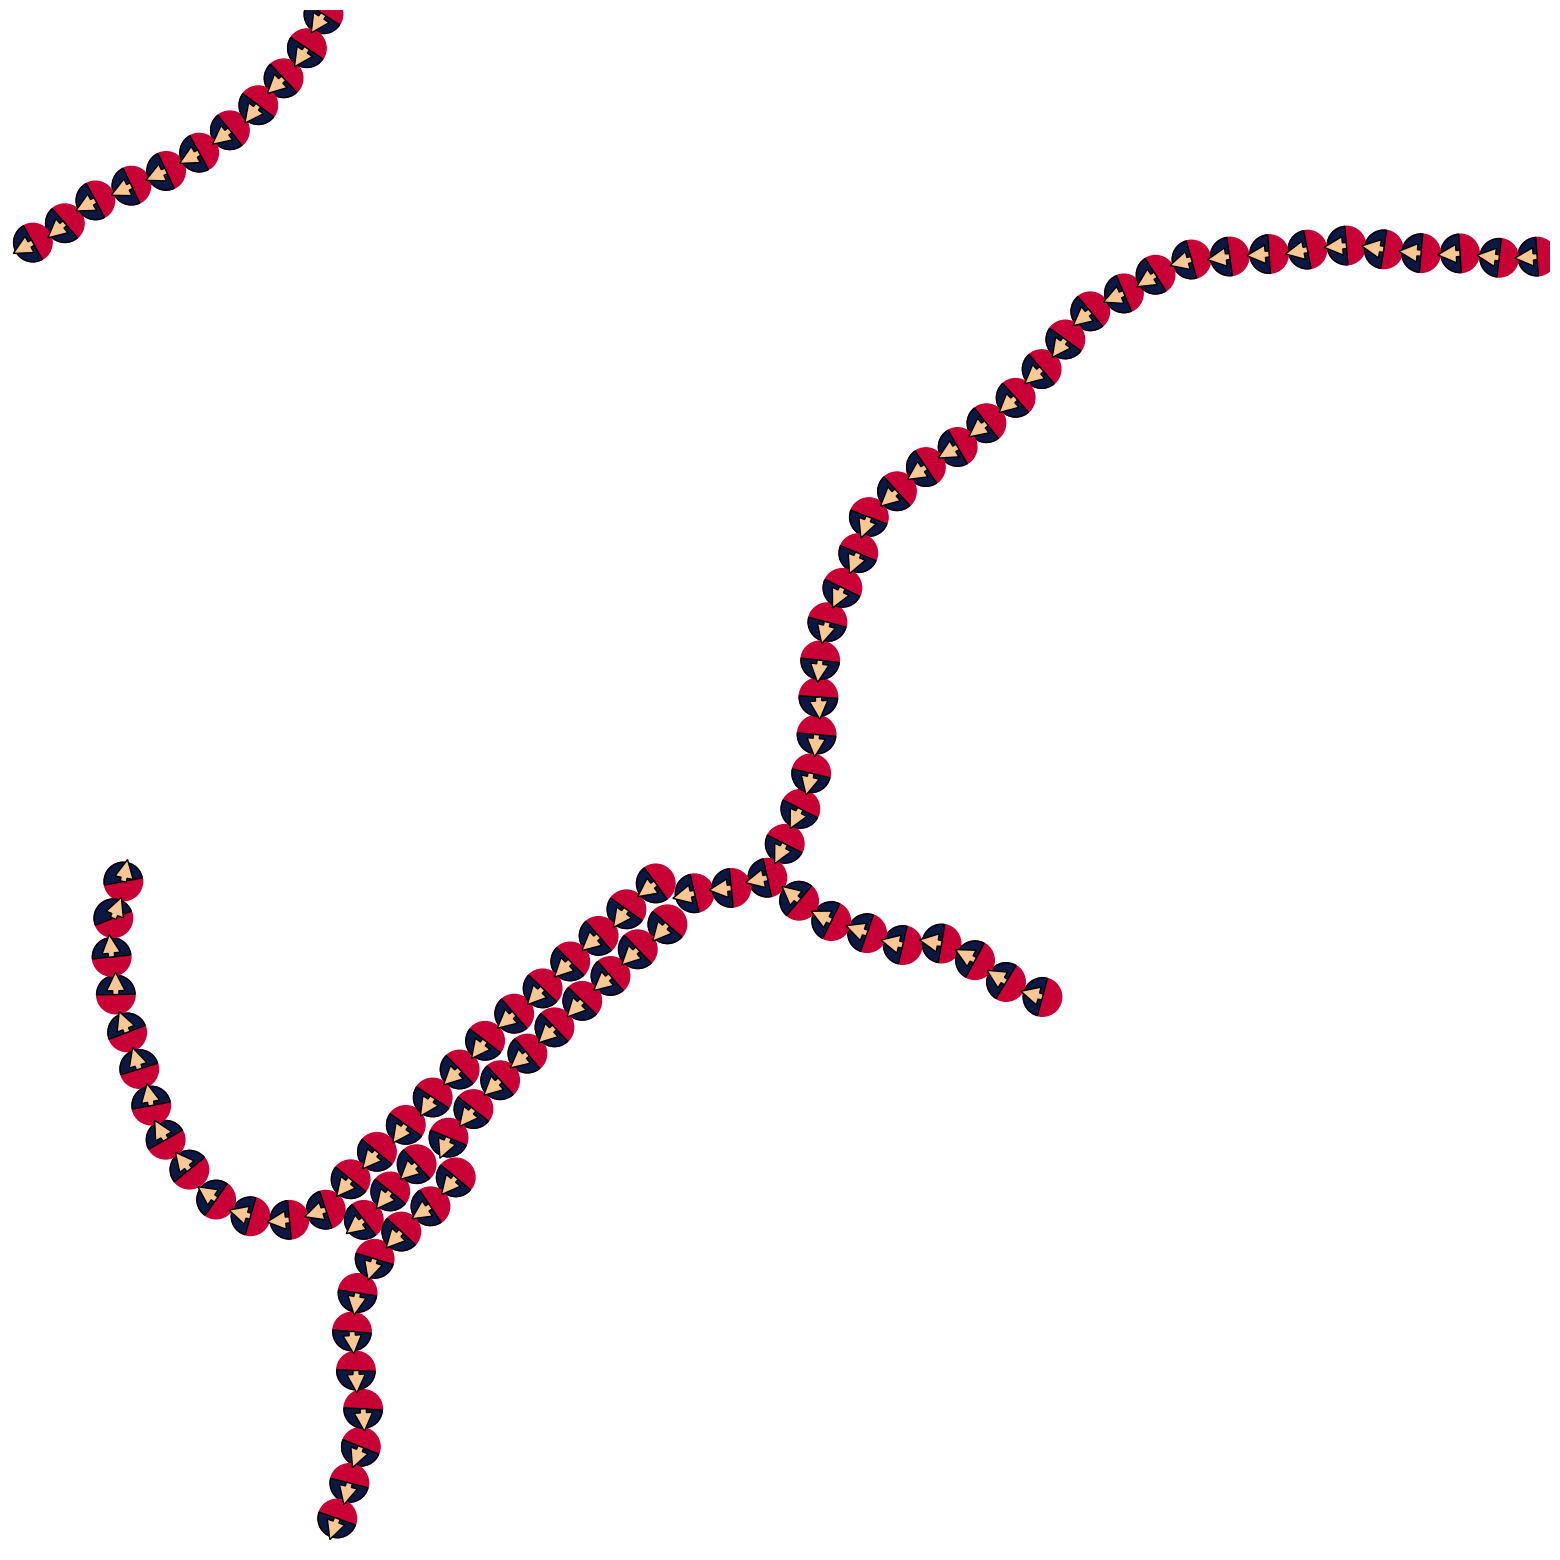

In [107]:
last_frame = np.array(particles[-1])

core_particles = last_frame[::2,2:4]*40
patch_particles = last_frame[1::2,2:4]*40
    

dist = (patch_particles-core_particles)

from matplotlib.patches import Wedge, Rectangle

fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

radius = 0.5/40

for i, center_i in enumerate(core_particles):

    theta1 =  np.arccos(dist[i,1]/np.linalg.norm(dist[i],axis=0))*180/np.pi
   
    theta2 = theta1 - 180 
    center = (center_i[0]/40.,center_i[1]/40.)   
    w = Wedge(center, radius, theta1, theta2, fc='#0C1844', edgecolor='black')
    c = plt.Circle(center,radius, color='#C80036')
 
    width=0.004
    ax.axis("off")
    ax.add_patch(c)
    ax.add_patch(w)
    ax.arrow(center_i[0]/40., 
             center_i[1]/40., 
             dist[i,0]/40, dist[i,1]/40,
             width = width,
             zorder = 10,
             head_width=width*3,
             head_length=width*3,
             fc = "#F8C794", 
             ec = "k")
    
    

plt.show()


In [75]:
np.arccos(-1)

3.141592653589793